# Stroke prediction

In [34]:
%pwd

'c:\\Users\\thami\\Documents'

In [35]:
import pandas as pd
healthcare = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [36]:
healthcare.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [37]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [38]:
healthcare.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Data preprocessing

In [39]:
healthcare['bmi'].fillna(healthcare['bmi'].mean(),inplace=True)

In [40]:
healthcare.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
healthcare.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [42]:
healthcare.drop('id',axis=1,inplace=True)

In [43]:
healthcare.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [44]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(healthcare['gender'])
smoking_status=enc.fit_transform(healthcare['smoking_status'])
work_type=enc.fit_transform(healthcare['work_type'])
Residence_type=enc.fit_transform(healthcare['Residence_type'])
ever_married=enc.fit_transform(healthcare['ever_married'])
healthcare['work_type']=work_type
healthcare['ever_married']=ever_married
healthcare['Residence_type']=Residence_type
healthcare['smoking_status']=smoking_status
healthcare['gender']=gender

In [45]:
healthcare.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [46]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


<AxesSubplot:>

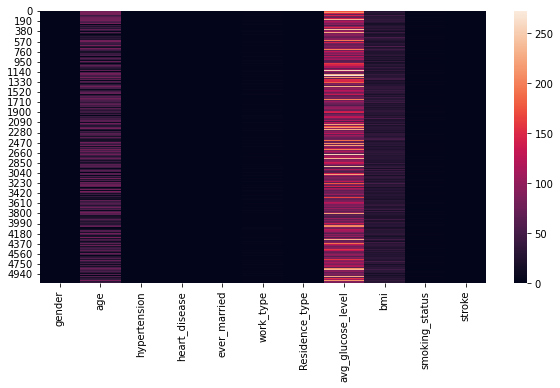

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(healthcare)

## Train - test data split

In [48]:
X=healthcare[['age', 'avg_glucose_level', 'bmi']]

In [49]:
y=healthcare['stroke']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_std,y_train)
ypred=dt.predict(X_test_std)

In [53]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(y_test,ypred)
ac_dt

0.9031311154598826

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_std,y_train)
LogisticRegression()
ypredlr=lr.predict(X_test_std)

In [56]:
ypredlr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
ac_lr=accuracy_score(y_test,ypredlr)
ac_lr

0.9393346379647749

## Support Vector Machines

In [58]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train_std,y_train)
ypredsv=sv.predict(X_test_std)

In [59]:
ac_sv=accuracy_score(y_test,ypredsv)
ac_sv

0.9393346379647749

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(X_train_std, y_train)
ypredrand = rand.predict(X_test_std)

In [61]:
ac_rand=accuracy_score(y_test,ypredrand)
ac_rand

0.9354207436399217

In [65]:
from xgboost import XGBClassifier
xgboostc = XGBClassifier()
xgboostc.fit(X_train_std, y_train)
ypredxgboostc = xgboostc.predict(X_test_std)

In [66]:
ac_xgb=accuracy_score(y_test,ypredxgboostc)
ac_xgb

0.9344422700587084

## Model Comparison

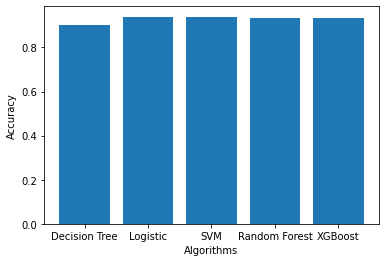

In [67]:
plt.bar(['Decision Tree','Logistic','SVM', 'Random Forest', 'XGBoost'],[ac_dt,ac_lr,ac_sv,ac_rand,ac_xgb])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()